## Part 1: Setup and Imports

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import os
import sys

# Import our training functions
from gan_training import train_gan, visualize_losses, analyze_convergence
from models.basic_gan import create_generator, create_discriminator

# Device setup
if torch.backends.mps.is_available():
    device = torch.device("mps")
elif torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

print(f"Using device: {device}")
torch.manual_seed(42)


Using device: cuda


## Part 2: Load Fashion MNIST Dataset

100%|██████████| 26.4M/26.4M [00:01<00:00, 17.2MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 272kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 5.07MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 14.8MB/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw

 Dataset loaded: 60000 images
  Batch size: 64
  Number of batches per epoch: 938


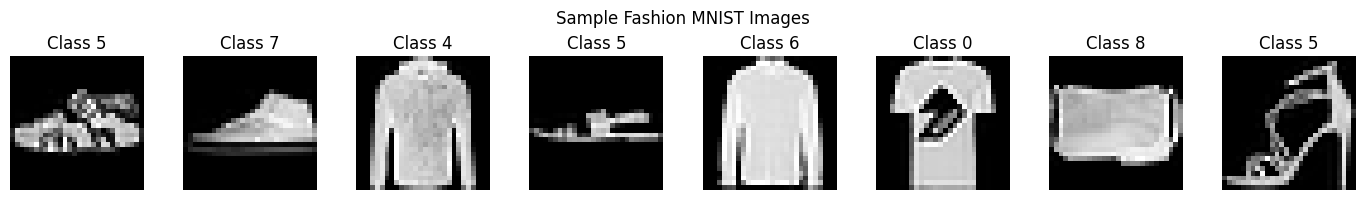

In [2]:
# Define transforms
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,)),  # Normalize to [-1, 1]
    ]
)

# Load Fashion MNIST
print("Downloading Fashion MNIST dataset...")
train_dataset = datasets.FashionMNIST(
    root="./data", train=True, download=True, transform=transform
)

# Create dataloader
batch_size = 64
train_loader = DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True, num_workers=0
)

print(f" Dataset loaded: {len(train_dataset)} images")
print(f"  Batch size: {batch_size}")
print(f"  Number of batches per epoch: {len(train_loader)}")

# Show sample images
fig, axes = plt.subplots(1, 8, figsize=(14, 2))
for i, (img, label) in enumerate(train_loader):
    if i >= 8:
        break
    ax = axes[i]
    ax.imshow(img[0].squeeze().cpu(), cmap="gray")
    ax.set_title(f"Class {label[0]}")
    ax.axis("off")
plt.suptitle("Sample Fashion MNIST Images")
plt.tight_layout()
plt.show()


## Part 3: Create Generator and Discriminator

In [3]:
# Create models
generator = create_generator(latent_dim=100, device=device)
discriminator = create_discriminator(device=device)

print("Generator:")
print(generator)
print(f"\nParameters: {sum(p.numel() for p in generator.parameters()):,}")

print("\n" + "=" * 50)
print("\nDiscriminator:")
print(discriminator)
print(f"\nParameters: {sum(p.numel() for p in discriminator.parameters()):,}")


Generator:
BasicGenerator(
  (network): Sequential(
    (0): Linear(in_features=100, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): LeakyReLU(negative_slope=0.2, inplace=True)
    (4): Linear(in_features=256, out_features=784, bias=True)
    (5): Tanh()
  )
)

Parameters: 293,136


Discriminator:
SimpleDiscriminator(
  (network): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): LeakyReLU(negative_slope=0.2, inplace=True)
    (4): Linear(in_features=256, out_features=1, bias=True)
    (5): Sigmoid()
  )
)

Parameters: 533,505


## Part 4: Train the GAN (50 Epochs)

This will take 5-10 minutes depending on your hardware.

In [4]:
# Train the GAN
d_losses, g_losses, generated_samples = train_gan(
    generator=generator,
    discriminator=discriminator,
    train_loader=train_loader,
    num_epochs=50,
    device=device,
    lr=0.0002,
    beta1=0.5,
    checkpoint_interval=5,
)

print(f"\nTraining complete!")
print(f"Total loss values tracked: {len(d_losses)}")
print(f"Generated sample checkpoints: {len(generated_samples)}")


Starting GAN training for 50 epochs...
Device: cuda

Epoch 1/50 | D Loss: 0.2185 | G Loss: 3.0130
Epoch 2/50 | D Loss: 0.2902 | G Loss: 2.8643
Epoch 3/50 | D Loss: 0.3142 | G Loss: 2.6266
Epoch 4/50 | D Loss: 0.3422 | G Loss: 2.3386
Epoch 5/50 | D Loss: 0.3609 | G Loss: 2.2254
Epoch 6/50 | D Loss: 0.3794 | G Loss: 2.1137
Epoch 7/50 | D Loss: 0.3963 | G Loss: 1.9885
Epoch 8/50 | D Loss: 0.4176 | G Loss: 1.8983
Epoch 9/50 | D Loss: 0.4325 | G Loss: 1.8181
Epoch 10/50 | D Loss: 0.4360 | G Loss: 1.7407
Epoch 11/50 | D Loss: 0.4448 | G Loss: 1.7282
Epoch 12/50 | D Loss: 0.4551 | G Loss: 1.6476
Epoch 13/50 | D Loss: 0.4531 | G Loss: 1.6226
Epoch 14/50 | D Loss: 0.4554 | G Loss: 1.6252
Epoch 15/50 | D Loss: 0.4596 | G Loss: 1.6014
Epoch 16/50 | D Loss: 0.4601 | G Loss: 1.5862
Epoch 17/50 | D Loss: 0.4604 | G Loss: 1.5775
Epoch 18/50 | D Loss: 0.4632 | G Loss: 1.5577
Epoch 19/50 | D Loss: 0.4613 | G Loss: 1.5610
Epoch 20/50 | D Loss: 0.4647 | G Loss: 1.5448
Epoch 21/50 | D Loss: 0.4657 | G Los

## Part 5: Visualize Loss Curves

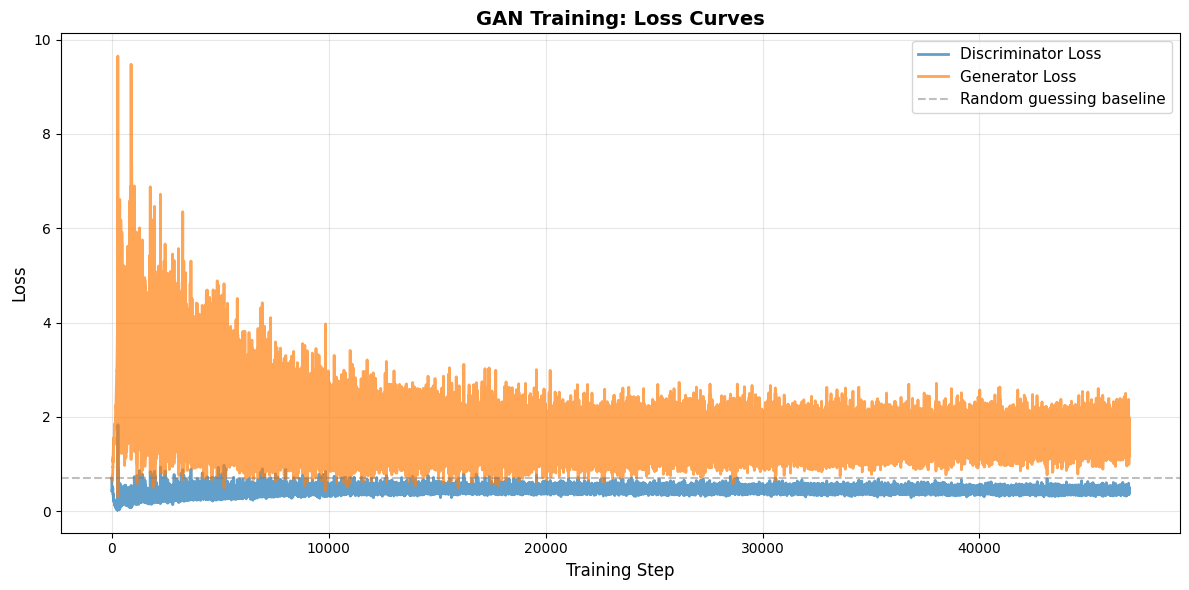

Discriminator loss statistics:
  Initial: 0.6885
  Final: 0.4038
  Min: 0.0216
  Max: 1.8299
  Average: 0.4329

Generator loss statistics:
  Initial: 0.7033
  Final: 1.9757
  Min: 0.3082
  Max: 9.6536
  Average: 1.7117


In [5]:
# Plot losses
fig = visualize_losses(d_losses, g_losses)
plt.show()

# Print statistics
print(f"Discriminator loss statistics:")
print(f"  Initial: {d_losses[0]:.4f}")
print(f"  Final: {d_losses[-1]:.4f}")
print(f"  Min: {min(d_losses):.4f}")
print(f"  Max: {max(d_losses):.4f}")
print(f"  Average: {np.mean(d_losses):.4f}")

print(f"\nGenerator loss statistics:")
print(f"  Initial: {g_losses[0]:.4f}")
print(f"  Final: {g_losses[-1]:.4f}")
print(f"  Min: {min(g_losses):.4f}")
print(f"  Max: {max(g_losses):.4f}")
print(f"  Average: {np.mean(g_losses):.4f}")


## Part 6: Analyze Convergence

In [7]:
# Analyze convergence
analyze_convergence(d_losses, g_losses)



CONVERGENCE ANALYSIS

Recent average losses (last 100 batches):
  Discriminator: 0.4346
  Generator: 1.6022

Loss stability (std dev):
  Discriminator: 0.0538
  Generator: 0.2660

Failure mode detection:
   BALANCED: D loss 0.4346
     Discriminator and Generator are in competition
   HIGH GENERATOR LOSS: 1.6022
     Generator struggles to fool discriminator

Nash Equilibrium characteristics:
  - D loss should stabilize around 0.5-0.7
  - G loss should decrease over time
  - Both losses should not oscillate wildly
  - Generated samples should improve with training


## Part 7: Visualize Generated Samples Over Training

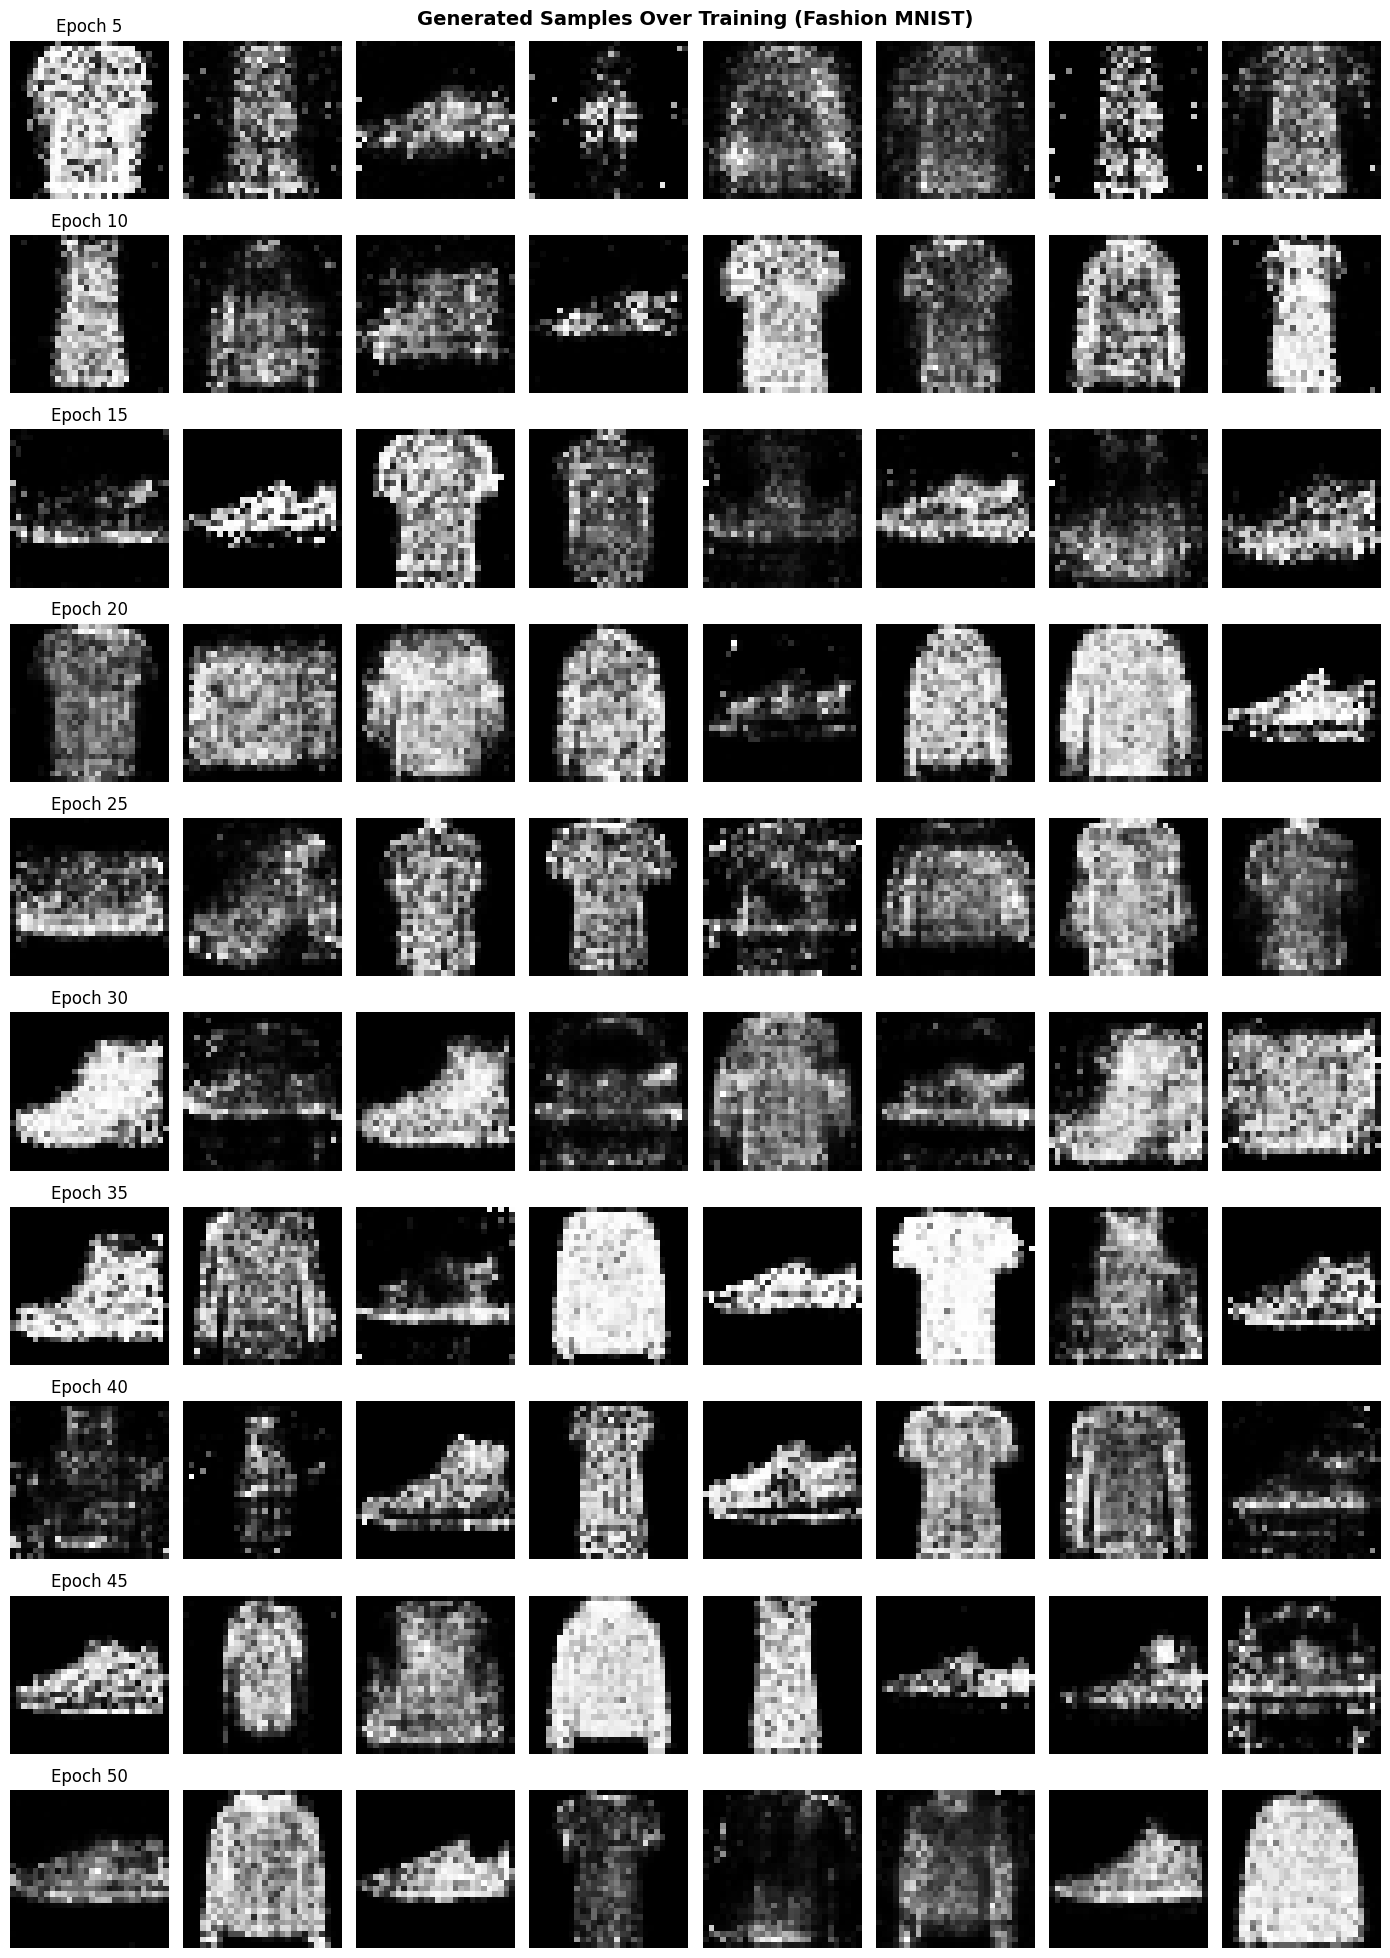

✓ Generated 10 checkpoints
  Each checkpoint shows 8 random samples


In [8]:
# Plot generated samples at each checkpoint
num_checkpoints = len(generated_samples)
fig, axes = plt.subplots(num_checkpoints, 8, figsize=(14, 2 * num_checkpoints))

for checkpoint_idx, samples in enumerate(generated_samples):
    epoch_num = (checkpoint_idx + 1) * 5  # Checkpoint every 5 epochs

    for img_idx in range(8):
        ax = axes[checkpoint_idx, img_idx] if num_checkpoints > 1 else axes[img_idx]

        img = samples[img_idx].squeeze()
        ax.imshow(img.cpu(), cmap="gray")
        ax.set_title(f"Epoch {epoch_num}" if img_idx == 0 else "")
        ax.axis("off")

plt.suptitle(
    "Generated Samples Over Training (Fashion MNIST)", fontsize=14, fontweight="bold"
)
plt.tight_layout()
plt.show()

print(f"✓ Generated {len(generated_samples)} checkpoints")
print(f"  Each checkpoint shows 8 random samples")


## Part 8: Final Generated Samples (High Resolution)

Generate a final grid of samples from the trained generator.

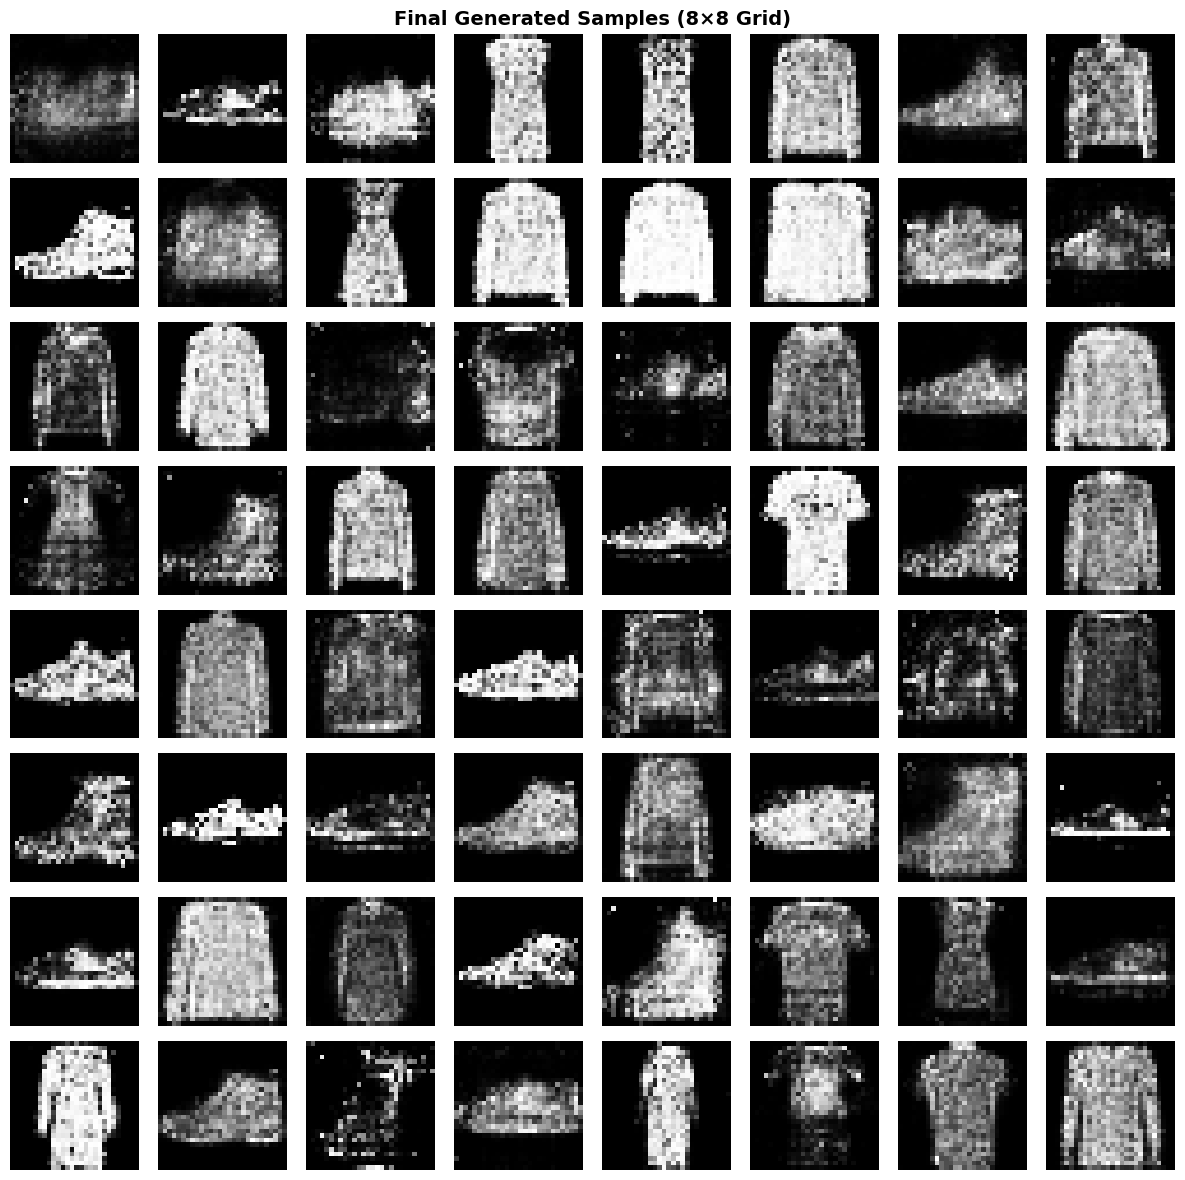

✓ Generated 64 final samples


In [9]:
# Generate final samples
generator.eval()
with torch.no_grad():
    noise = torch.randn(64, 100, device=device)
    final_samples = generator(noise)
    final_samples = final_samples.view(-1, 1, 28, 28)

# Visualize as 8x8 grid
fig, axes = plt.subplots(8, 8, figsize=(12, 12))

for idx, ax in enumerate(axes.flat):
    img = final_samples[idx].squeeze().cpu()
    ax.imshow(img, cmap="gray")
    ax.axis("off")

plt.suptitle("Final Generated Samples (8×8 Grid)", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

print("✓ Generated 64 final samples")


## Summary: Key Takeaways

### The Adversarial Game
- **Discriminator**: Minimizes loss by correctly classifying real/fake
- **Generator**: Minimizes loss by fooling the discriminator
- **Result**: Both networks improve iteratively

### Loss Curve Interpretation
- **D loss decreasing**: Discriminator gets better at distinguishing
- **G loss decreasing**: Generator gets better at fooling D
- **Ideal**: Losses stabilize (Nash Equilibrium reached)
- **Bad**: D loss → 0 (G has collapsed, no feedback)

### Generated Sample Quality
- **Early epochs**: Random noise patterns
- **Mid epochs**: Basic shapes emerge
- **Late epochs**: Recognizable clothing items

### Next Steps
1. Experiment with hyperparameters (learning rate, batch size)
2. Try conditional GAN (cGAN) to control what class is generated
3. Use Inception Score (IS) or Fréchet Inception Distance (FID) to measure quality
4. Train longer or use spectral normalization to improve stability